# 문제 06 유형(DataSet_06.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 4,323 Rows, 19 Columns, UTF-8 인코딩

# 주택 관련 정보를 바탕으로 주택 가격을 예측해 보고자 한다. 
# 다음은 확보한 주택 관련 데이터로 총 19개 컬럼으로 구성되어
# 있다.

# 컬 럼 / 정 의 / Type
# id / 매물 번호 / Double
# date / 날짜 / String
# price / 거래 가격 / Double
# bedrooms / 방 개수 / Double
# bathrooms / 화장실 개수 (화장실은 있으나 샤워기 없는 경우 0.5로 처리) / Double
# sqft_living / 건축물 면적 / Double
# sqft_lot / 대지 면적 / Double
# floors / 건축물의 층수 / Double
# waterfront / 강변 조망 가능 여부 (0 / 1) / Double
# view / 경관 (나쁨에서 좋음으로 0 ~ 4로 표시) / Double
# condition / 관리 상태 (나쁨에서 좋음으로 1 ~ 5로 표시) / Double
# grade / 등급 (낮음에서 높음으로 1 ~ 13으로 표시) / Double
# sqft_above / 지상 면적 / Double
# sqft_basement / 지하실 면적 / Double
# yr_built / 건축 연도 / Double
# yr_renovated / 개축 연도 / Double
# zipcode / 우편번호 / Double
# sqft_living15 / 15개의 인근 주택의 평균 건물 면적 / Double
# sqft_lot15 / 15개의 인근 주택의 평균 대지 면적 / Double
# =============================================================================
# =============================================================================

In [1]:
import pandas as pd  # 데이터 불러오기/내보내기/전처리/기술통계
import numpy as np  # 데이터 전처리 및 일괄 처리, 벡터 반올림/올림/내림/절단
import scipy.stats as st # 기술통계, 통계 모수적 방법론(t,f, 분산분석, 카이스퀘어 검정 등)
from statsmodels.formula.api import ols  # 모수적 방법론, 선형회귀, 로지스틱, 시계열 분석 등)
from sklearn.linear_model import LinearRegression # 머신러닝 전처리 및 방법론

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data6=pd.read_csv('../Dataset/Dataset_06.csv')
data6.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178


In [3]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [4]:
data6['date']=pd.to_datetime(data6['date'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             4323 non-null   int64         
 1   date           4323 non-null   datetime64[ns]
 2   price          4323 non-null   float64       
 3   bedrooms       4323 non-null   int64         
 4   bathrooms      4323 non-null   float64       
 5   sqft_living    4323 non-null   int64         
 6   sqft_lot       4323 non-null   int64         
 7   floors         4323 non-null   float64       
 8   waterfront     4323 non-null   int64         
 9   view           4323 non-null   int64         
 10  condition      4323 non-null   int64         
 11  grade          4323 non-null   int64         
 12  sqft_above     4323 non-null   int64         
 13  sqft_basement  4323 non-null   int64         
 14  yr_built       4323 non-null   int64         
 15  yr_renovated   4323 n

In [7]:
data6.date.dt.day_name()

0        Monday
1       Tuesday
2        Friday
3       Tuesday
4        Friday
         ...   
4318    Tuesday
4319    Tuesday
4320     Friday
4321     Friday
4322     Monday
Name: date, Length: 4323, dtype: object

In [8]:
import locale

In [9]:
locale.locale_alias

{'a3': 'az_AZ.KOI8-C',
 'a3_az': 'az_AZ.KOI8-C',
 'a3_az.koic': 'az_AZ.KOI8-C',
 'aa_dj': 'aa_DJ.ISO8859-1',
 'aa_er': 'aa_ER.UTF-8',
 'aa_et': 'aa_ET.UTF-8',
 'af': 'af_ZA.ISO8859-1',
 'af_za': 'af_ZA.ISO8859-1',
 'agr_pe': 'agr_PE.UTF-8',
 'ak_gh': 'ak_GH.UTF-8',
 'am': 'am_ET.UTF-8',
 'am_et': 'am_ET.UTF-8',
 'american': 'en_US.ISO8859-1',
 'an_es': 'an_ES.ISO8859-15',
 'anp_in': 'anp_IN.UTF-8',
 'ar': 'ar_AA.ISO8859-6',
 'ar_aa': 'ar_AA.ISO8859-6',
 'ar_ae': 'ar_AE.ISO8859-6',
 'ar_bh': 'ar_BH.ISO8859-6',
 'ar_dz': 'ar_DZ.ISO8859-6',
 'ar_eg': 'ar_EG.ISO8859-6',
 'ar_in': 'ar_IN.UTF-8',
 'ar_iq': 'ar_IQ.ISO8859-6',
 'ar_jo': 'ar_JO.ISO8859-6',
 'ar_kw': 'ar_KW.ISO8859-6',
 'ar_lb': 'ar_LB.ISO8859-6',
 'ar_ly': 'ar_LY.ISO8859-6',
 'ar_ma': 'ar_MA.ISO8859-6',
 'ar_om': 'ar_OM.ISO8859-6',
 'ar_qa': 'ar_QA.ISO8859-6',
 'ar_sa': 'ar_SA.ISO8859-6',
 'ar_sd': 'ar_SD.ISO8859-6',
 'ar_ss': 'ar_SS.UTF-8',
 'ar_sy': 'ar_SY.ISO8859-6',
 'ar_tn': 'ar_TN.ISO8859-6',
 'ar_ye': 'ar_YE.ISO8859-6',


In [13]:
data6.date.dt.strftime('%A')

0        Monday
1       Tuesday
2        Friday
3       Tuesday
4        Friday
         ...   
4318    Tuesday
4319    Tuesday
4320     Friday
4321     Friday
4322     Monday
Name: date, Length: 4323, dtype: object

In [14]:
locale.setlocale(locale.LC_ALL,'')

'Korean_Korea.949'

In [15]:
data6.date.dt.strftime('%A')

0       월요일
1       화요일
2       금요일
3       화요일
4       금요일
       ... 
4318    화요일
4319    화요일
4320    금요일
4321    금요일
4322    월요일
Name: date, Length: 4323, dtype: object

In [16]:
data6.date.dt.day_name(locale='Korean_Korea.949')

0       월요일
1       화요일
2       금요일
3       화요일
4       금요일
       ... 
4318    화요일
4319    화요일
4320    금요일
4321    금요일
4322    월요일
Name: date, Length: 4323, dtype: object

In [ ]:
# =============================================================================
# 1.강변 조망이 가능한지 여부(waterfront)에 따라 평균 주택 가격을 계산하고 조망이
# 가능한 경우와 그렇지 않은 경우의 평균 가격 차이의 절대값을 구하시오. 답은
# 소수점 이하는 버리고 정수부만 기술하시오. (답안 예시) 1234567
# =============================================================================

In [17]:
q6_1_1=data6[data6.waterfront == 1]['price'].mean()
q6_1_0=data6[data6.waterfront == 0]['price'].mean()

np.trunc(abs(q6_1_1-q6_1_0))  # 답: 1167272

1167272.0

In [ ]:
# =============================================================================
# 2.price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built 등 7개의 변수 간의
# 상관분석을 수행하고 price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은
# 변수를 차례로 기술하시오. (답안 예시) view, zipcode
# 
# =============================================================================

In [18]:
q6_2_list=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [21]:
q6_2=data6[q6_2_list].corr()['price'].drop('price')

q6_2.abs().idxmax(), q6_2.abs().idxmin()  # 답: 'sqft_living', 'yr_built'

('sqft_living', 'yr_built')

In [ ]:
# =============================================================================
# 3. id, date, 그리고 zipcode를 제외한 모든 변수를 독립변수로, price를 종속변수로 하여
# 회귀분석을 수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀
# 모형에 남는 변수는 모두
# 몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3
# =============================================================================

# =============================================================================
# (참고)
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from statsmodels.formula.api import ols
# =============================================================================

In [ ]:
# lm1=ols('y~x1+x2+C(x3)-1', 데이터셋)
# C(x3): 범주형 변수로 인식-> 인식 후 더미로 변수 변환
# -1: 회귀식에 상수항 미포함
# lm2=lm1.fit()
#-------------------------------------------------------

# lm1=ols('y~x1+x2+C(x3)-1', 데이터셋).fit()

In [22]:
q6_3_list=data6.columns.drop(['id', 'date','zipcode','price'])  # 독립변수 목록
q6_3_list

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [23]:
'+'.join(q6_3_list)

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [26]:
form1='price~' + '+'.join(q6_3_list)
form1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [27]:
ols_6_3 = ols(form1, data6).fit()

In [28]:
ols_6_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                    금, 16 2 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3081      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.67e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
ols_6_3.params

Intercept        6.302495e+06
bedrooms        -2.499553e+04
bathrooms        5.179234e+04
sqft_living      9.230805e+01
sqft_lot         5.444844e-03
floors           3.748199e+04
waterfront       6.276528e+05
view             4.039778e+04
condition        1.570573e+04
grade            1.306274e+05
sqft_above       3.373578e+01
sqft_basement    5.857224e+01
yr_built        -3.666896e+03
yr_renovated     1.770319e+01
sqft_living15    2.301144e+01
sqft_lot15      -2.322904e-01
dtype: float64

In [30]:
ols_6_3.pvalues

Intercept         1.204633e-96
bedrooms          1.262643e-11
bathrooms         5.681393e-13
sqft_living       2.616896e-71
sqft_lot          9.532159e-01
floors            4.266372e-06
waterfront        1.931929e-56
view              5.028272e-17
condition         3.157318e-03
grade            1.760208e-156
sqft_above        1.431357e-11
sqft_basement     2.030036e-23
yr_built         1.717539e-122
yr_renovated      3.226128e-02
sqft_living15     2.352216e-03
sqft_lot15        1.017748e-01
dtype: float64

In [31]:
ols_6_3.fittedvalues  # 추정값

0       303167.404363
1       494555.779137
2       526394.280931
3       381742.870130
4       326405.856590
            ...      
4318    218820.959470
4319    700129.403303
4320    403050.034203
4321    530431.529542
4322    462692.590490
Length: 4323, dtype: float64

In [32]:
ols_6_3.resid   # 잔차

0        44332.595637
1        80444.220863
2       -36894.280931
3      -135742.870130
4       268594.143410
            ...      
4318    106179.040530
4319   -282729.403303
4320     11949.965797
4321     69568.470458
4322     -9692.590490
Length: 4323, dtype: float64

In [33]:
import matplotlib.pyplot as plt

In [34]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

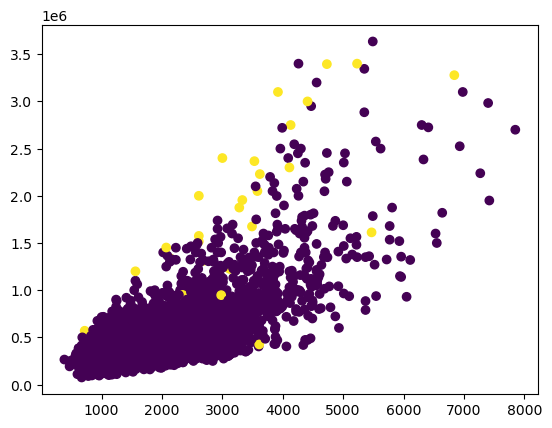

In [36]:
plt.scatter(x=data6.sqft_living, y=data6.price, c=data6.waterfront);

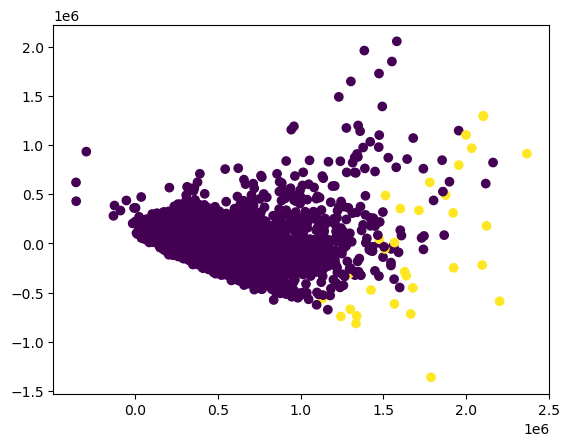

In [37]:
plt.scatter(x=ols_6_3.fittedvalues, y=ols_6_3.resid, c=data6.waterfront);

In [39]:
# 이상치 체크

q6_3_new=data6[ols_6_3.outlier_test()['bonf(p)'] >= 0.05]

len(data6), len(q6_3_new)

(4323, 4297)

In [40]:
sel_var=ols_6_3.pvalues[ols_6_3.pvalues < 0.05]
sel_var  # 답1 : 13

Intercept         1.204633e-96
bedrooms          1.262643e-11
bathrooms         5.681393e-13
sqft_living       2.616896e-71
floors            4.266372e-06
waterfront        1.931929e-56
view              5.028272e-17
condition         3.157318e-03
grade            1.760208e-156
sqft_above        1.431357e-11
sqft_basement     2.030036e-23
yr_built         1.717539e-122
yr_renovated      3.226128e-02
sqft_living15     2.352216e-03
dtype: float64

In [42]:
sel_var=sel_var.index.drop('Intercept')
sel_var

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15'],
      dtype='object')

In [45]:
(ols_6_3.params[sel_var] < 0).sum()  # 답2(음수의 회귀계수): 2

2

### 표준화 및 다중공선성(VIF)

In [46]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [47]:
minmax=MinMaxScaler().fit(data6[sel_var])

In [48]:
minmax.data_max_

array([3.300e+01, 6.500e+00, 7.850e+03, 3.500e+00, 1.000e+00, 4.000e+00,
       5.000e+00, 1.300e+01, 7.850e+03, 2.620e+03, 2.015e+03, 2.015e+03,
       6.210e+03])

In [49]:
minmax.data_min_

array([0.00e+00, 0.00e+00, 3.84e+02, 1.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 3.00e+00, 3.84e+02, 0.00e+00, 1.90e+03, 0.00e+00,
       6.20e+02])

In [54]:
var_list2='st_' + sel_var

In [53]:
data6_new2=data6.copy()

In [55]:
data6_new2[var_list2]=minmax.transform(data6[sel_var])

In [56]:
data6_new2.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,st_floors,st_waterfront,st_view,st_condition,st_grade,st_sqft_above,st_sqft_basement,st_yr_built,st_yr_renovated,st_sqft_living15
0,2597000006,2015-03-09,347500.0,3,1.50,1180,8353,1.0,0,0,...,0.0,0.0,0.0,0.5,0.4,0.106617,0.000000,0.521739,0.0,0.194991
1,8813400345,2015-04-14,575000.0,2,1.00,980,3663,1.0,0,0,...,0.0,0.0,0.0,1.0,0.4,0.079829,0.000000,0.078261,0.0,0.178891
2,226059106,2015-01-02,489500.0,3,1.75,2090,65558,1.0,0,0,...,0.0,0.0,0.0,0.5,0.5,0.126708,0.290076,0.669565,0.0,0.327370


In [57]:
data6_new2['day']=data6.date.dt.strftime('%a')

In [58]:
data6_new2['day']

0       월
1       화
2       금
3       화
4       금
       ..
4318    화
4319    화
4320    금
4321    금
4322    월
Name: day, Length: 4323, dtype: object

In [64]:
onehot=OneHotEncoder(sparse=False).fit(data6_new2[['day']])

In [65]:
onehot_out=onehot.transform(data6_new2[['day']])
# print(onehot_out)
onehot_out

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
onehot.categories_

[array(['금', '목', '수', '월', '일', '토', '화'], dtype=object)]

In [68]:
data6_new2[onehot.categories_[0]]=onehot_out

In [69]:
data6_new2[onehot.categories_[0]].head()

,금,목,수,월,일,토,화
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
## vif

from statsmodels.stats.outliers_influence import variance_inflation_factor  # vif

In [71]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

In [72]:
variance_inflation_factor(data6_new2[var_list2], 0)  # 기준 10

15.300242588205293

In [73]:
vif=[variance_inflation_factor(data6_new2[var_list2], i) for i in np.arange(len(var_list2))]
vif

[15.300242588205293,
 27.185945847439378,
 inf,
 3.541951765354249,
 1.220050611931144,
 1.5394691655924386,
 10.887185560821454,
 37.90806151979273,
 inf,
 inf,
 12.537174425453188,
 1.1511020018120393,
 14.235836410118734]

In [74]:
vif=pd.Series(vif, index=var_list2)
vif

st_bedrooms         15.300243
st_bathrooms        27.185946
st_sqft_living            inf
st_floors            3.541952
st_waterfront        1.220051
st_view              1.539469
st_condition        10.887186
st_grade            37.908062
st_sqft_above             inf
st_sqft_basement          inf
st_yr_built         12.537174
st_yr_renovated      1.151102
st_sqft_living15    14.235836
dtype: float64

In [75]:
vif.idxmax()

'st_sqft_living'

In [77]:
sel_list3=var_list2.drop('st_sqft_living')
sel_list3

Index(['st_bedrooms', 'st_bathrooms', 'st_floors', 'st_waterfront', 'st_view',
       'st_condition', 'st_grade', 'st_sqft_above', 'st_sqft_basement',
       'st_yr_built', 'st_yr_renovated', 'st_sqft_living15'],
      dtype='object')

In [79]:
vif2=[variance_inflation_factor(data6_new2[sel_list3], i) for i in np.arange(len(sel_list3))]
vif2=pd.Series(vif2, index=sel_list3)
vif2

st_bedrooms         15.300243
st_bathrooms        27.185946
st_floors            3.541952
st_waterfront        1.220051
st_view              1.539469
st_condition        10.887186
st_grade            37.908062
st_sqft_above       16.174603
st_sqft_basement     2.686081
st_yr_built         12.537174
st_yr_renovated      1.151102
st_sqft_living15    14.235836
dtype: float64

# 문제 07 유형(DataSet_07.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 400 Rows, 9 Columns, UTF-8 인코딩
#
# 대학원 진학을 위하여 어떤 항목이 중요하게 영향을 미치는지
# 아래 데이터로 분석하고자 한다.

# 컬 럼 / 정 의 / Type
# Serial_No / 구분자 번호 / Double
# GRE / GRE 시험 성적 / Double
# TOEFL / TOEFL 시험 성적 / Double
# University_Rating / 대학 평가 그룹 (1 ~ 5) / Double
# SOP / 자기 소개서 점수 (1 ~ 5) / Double
# LOR / 추천서 점수 (1 ~ 5) / Double
# CGPA / 학부 평량 평점 (10점 만점 환산 점수) / Double
# Research / 연구 참여 경험 여부 (0 / 1) / Double
# Chance_of_Admit / 합격 가능성 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# #2
# import scipy.stats as stats
# #3
# from sklearn.linear_model import LogisticRegression
# Solver = ‘liblinear’, random_state = 12
# =============================================================================

In [ ]:
# =============================================================================
# 1. 합격 가능성에 GRE, TOEFL, CGPA 점수 가운데 가장 영향이 큰 것이 어떤 점수인지
# 알아 보기 위해서 상관 분석을 수행한다.
# - 피어슨(Pearson) 상관계수 값을 구한다.
# - Chance_of_Admit와의 가장 큰 상관계수 값을 가지는 항목의 상관계수를 소수점 넷째
# 자리에서 반올림하여 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [ ]:
# =============================================================================
# 2.GRE 점수의 평균 이상을 받은 그룹과 평균 미만을 받은 그룹의 CGPA 평균은 차이가
# 있는지
# 검정을 하고자 한다.
# - 적절한 검정 방법을 선택하고 양측 검정을 수행하시오 (등분산으로 가정)
# - 검정 결과, 검정통계량의 추정치를 소수점 셋째 자리에서 반올림하여 소수점 두 자리까지
# 기술하시오.
# (답안 예시) 1.23
# =============================================================================

In [ ]:
# =============================================================================
# 3.Chance_of_Admit 확률이 0.5를 초과하면 합격으로, 이하이면 불합격으로 구분하고
# 로지스틱 회귀분석을 수행하시오.
# - 원데이터만 사용하고, 원데이터 가운데 Serial_No와 Label은 모형에서 제외
# - 각 설정값은 다음과 같이 지정하고, 언급되지 않은 사항은 기본 설정값을 사용하시오
# Seed : 123
# - 로지스틱 회귀분석 수행 결과에서 로지스틱 회귀계수의 절대값이 가장 큰 변수와 그 값을
# 기술하시오. 
# (로지스틱 회귀계수는 반올림하여 소수점 둘째 자리까지 / Intercept는 제외)
# (답안 예시) abc, 0.12
# =============================================================================

# 문제 08 유형(DataSet_08.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 50 Rows, 5 Columns, UTF-8 인코딩
#
# 스타트업 기업들의 수익성에 대한 분석을 하기 위하여
# 아래와 같은 데이터를 입수하였다
#
# 
# 컬 럼 / 정 의 / Type
# RandD_Spend / 연구개발비 지출 / Double
# Administration / 운영관리비 지출 / Double
# Marketing_Spend / 마케팅비 지출 / Double
# State / 본사 위치 / String
# Profit / 이익 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #3
# from sklearn.linear_model import LinearRegression
# =============================================================================

In [ ]:
# =============================================================================
# 1.각 주(State)별 데이터 구성비를 소수점 둘째 자리까지 구하고, 알파벳 순으로
# 기술하시오(주 이름 기준).
# (답안 예시) 0.12, 0.34, 0.54
# =============================================================================

In [ ]:
# =============================================================================
# 2.주별 이익의 평균을 구하고, 평균 이익이 가장 큰 주와 작은 주의 차이를 구하시오. 
# 차이값은 소수점 이하는 버리고 정수부분만 기술하시오. (답안 예시) 1234
# =============================================================================

In [ ]:
# =============================================================================
# 3.독립변수로 RandD_Spend, Administration, Marketing_Spend를 사용하여 Profit을 주별로
# 예측하는 회귀 모형을 만들고, 이 회귀모형을 사용하여 학습오차를 산출하시오.
# - 주별로 계산된 학습오차 중 MAPE 기준으로 가장 낮은 오차를 보이는 주는 어느
# 주이고 그 값은 무엇인가? (반올림하여 소수점 둘째 자리까지 기술하시오)
# - (MAPE = Σ ( | y - y ̂ | / y ) * 100/n )
# (답안 예시) ABC, 1.56
# =============================================================================

# 문제 09 유형(DataSet_09.csv 이용)

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 2000 Rows, 16 Columns, UTF-8 인코딩
#
# 항공사에서 고객만족도 조사를 하고 서비스 개선에 활용하고자
# 아래와 같은 데이터를 준비하였다.
#
# 컬 럼 / 정 의 / Type
# satisfaction / 서비스 만족 여부 / String
# Gender / 성별 / String
# Age / 나이 / Double
# Customer_Type / 고객 타입 / String
# Class / 탑승 좌석 등급 / String
# Flight_Distance / 비행 거리 / Double
# Seat_comfort / 좌석 안락도 점수 / Double
# Food_and_Drink / 식사와 음료 점수 / Double
# Inflight_wifi_service / 기내 와이파이 서비스 점수 / Double
# Inflight_entertainment / 기내 엔터테인먼트 서비스 점수 / Double
# Onboard_service / 탑승 서비스 점수 / Double
# Leg_room_service / 다리 공간 점수 / Double
# Baggage_handling / 수하물 취급 점수 / Double
# Cleanliness / 청결도 점수 / Double
# Departure_Daly_in_Minutes / 출발 지연 (분) / Double
# Arrival_Delay_in_Minutes / 도착 지연 (분) / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# import scipy.stats as stats
# #3
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# 
# =============================================================================

In [ ]:
# =============================================================================
# 1.데이터 타입을 위 표에 정의된 타입으로 전처리를 한 후, 데이터 파일 내에 결측값은
# 총 몇 개인가? (답안 예시) 1
# =============================================================================

In [ ]:
# =============================================================================
# 2.다음에 제시된 데이터 처리를 하고 카이제곱 독립성 검정을 수행하시오.
# - 결측값이 있다면 해당 행을 제거하시오.
# - 나이는 20 이하이면 10, 30 이하이면 20, 40 이하이면 30, 50 이하이면 40, 60 이하이면 50, 
# 60 초과는 60으로 변환하여 Age_gr으로 파생변수를 생성하시오.
# - Age_gr, Gender, Customer_Type, Class 변수가 satisfaction에 영향이 있는지 카이제곱
# 독립성 검정을 수행하시오. 
# - 연관성이 있는 것으로 파악된 변수의 검정통계량 추정치를 정수 부분만 기술하시오. 
# (답안 예시) 123
# =============================================================================

In [ ]:
#%%

# =============================================================================
# 3.고객 만족도를 라벨로 하여 다음과 같이 로지스틱 회귀분석을 수행하시오. 
# - 결측치가 포함된 행은 제거
# - 데이터를 7대 3으로 분리 (Seed = 123)
# - 아래의 11개 변수를 Feature로 사용
# Flight_Distance, Seat_comfort, Food_and_drink, Inflight_wifi_service, 
# Inflight_entertainment,Onboard_service, Leg_room_service, Baggage_handling,
# Cleanliness, Departure_Delay_in_Minutes, Arrival_Delay_in_Minutes
# 
# - Seed = 123, 이외의 항목은 모두 Default 사용
# - 예측 정확도를 측정하고 dissatisfied의 f1 score를 소수점 넷째 자리에서 반올림하여
# 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================















#%%

# =============================================================================
# =============================================================================
# # 문제 10 유형(DataSet_10.csv 이용)
#
# 구분자 : comma(“,”), 1538 Rows, 6 Columns, UTF-8 인코딩

# 중고 자동차 가격에 대한 분석을 위하여 아래와 같은 데이터를
# 확보하였다.

# 컬 럼 / 정 의 / Type
# model / 모델명 / String
# engine_power / 엔진 파워 / Double
# age_in_days / 운행 일수 / Double
# km / 운행 거리 / Double
# previous_owners / 이전 소유자 수 / Double
# price / 중고차 가격 / Double
# =============================================================================
# =============================================================================

# =============================================================================
# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# import scipy.stats as ststs
# #3
# from sklearn.linear_model import LinearRegression
# =============================================================================


#%%

# =============================================================================
# 1.이전 소유자 수가 한 명이고 엔진 파워가 51인 차에 대해 모델별 하루 평균 운행
# 거리를 산출하였을 때 가장 낮은 값을 가진 모델이 가장 큰 값을 가진 모델에 대한
# 비율은 얼마인가? 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지
# 기술하시오.
# (모델별 평균 → 일평균 → 최대최소 비율 계산) (답안 예시) 0.12
# =============================================================================













#%%

# =============================================================================
# 2.운행 일수에 대한 운행 거리를 산출하고, 위 1번 문제에서 가장 큰 값을 가지고 있던
# 모델과 가장 낮은 값을 가지고 있던 모델 간의 운행 일수 대비 운행거리 평균이 다른지
# 적절한 통계 검정을 수행하고 p-value를 소수점 세자리 이하는 버리고 소수점
# 두자리까지 기술하고 기각 여부를 Y / N로 답하시오. (등분산을 가정하고 equal_var = 
# True / var.equal = T로 분석을 실행하시오.)
# (답안 예시) 0.23, Y
# =============================================================================










#%%

# =============================================================================
# 3.독립변수로 engine_power, age_in_days, km를 사용하고 종속변수로 price를 사용하여
# 모델별 선형회귀분석을 수행하고, 산출된 모형을 사용하여 다음과 같은 조건의
# 중고차에 대한 가격을 예측하고 예측된 가격을 정수부만 기술하시오.
# - model : pop / engine_power : 51 / age_in_days : 400 / km : 9500 / previous_owners : 2

# (답안 예시) 12345
# =============================================================================
# model = pop이고 이전 소유자수가 2명인 데이터만을 이용하여 회귀모델을 생성하시오.